In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv("mobilenetv2v1.csv")
df

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,adagrad,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,adam,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,adamax,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,ftrl,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,nadam,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312
...,...,...,...,...,...,...,...,...,...
12983,adagrad,34.350,52.050,39.4244,2,348.0024,16,0.26609,0.92188
12984,adam,47.175,26.450,42.5518,2,261.0018,16,0.05710,0.97917
12985,adamax,41.950,55.550,34.3129,2,304.5021,16,0.13655,0.94271
12986,ftrl,49.975,37.400,39.8327,2,435.0031,16,0.29843,0.88542


In [3]:
df.optimizer.value_counts()

adagrad     1624
adam        1624
adamax      1624
ftrl        1624
nadam       1624
sgd         1623
rmsprop     1623
adadelta    1622
Name: optimizer, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   optimizer    12988 non-null  object 
 1   cpu          12988 non-null  float64
 2   memory       12988 non-null  float64
 3   time         12988 non-null  float64
 4   epochs       12988 non-null  int64  
 5   predictions  12988 non-null  float64
 6   dataset      12988 non-null  int64  
 7   loss         12988 non-null  float64
 8   accuracy     12988 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 913.3+ KB


In [5]:
df.isnull().sum()

optimizer      0
cpu            0
memory         0
time           0
epochs         0
predictions    0
dataset        0
loss           0
accuracy       0
dtype: int64

In [6]:
df.describe()

,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
count,12988.000000,12988.000000,12988.000000,12988.0,12988.000000,12988.000000,12988.000000,12988.000000
mean,54.141842,63.052446,32.533233,2.0,240.015293,14.461118,0.234340,0.885077
std,6.575235,17.160908,5.740987,0.0,124.391274,2.691719,0.235811,0.157746
min,26.125000,15.925000,22.577100,2.0,43.500300,1.000000,0.004010,0.187500
25%,50.450000,50.650000,27.835025,2.0,130.500900,15.000000,0.086760,0.890620
50%,55.325000,76.025000,30.809900,2.0,217.501500,15.000000,0.131420,0.953120
75%,58.600000,78.075000,36.954975,2.0,348.002400,16.000000,0.279487,0.968750
max,81.400000,82.925000,58.564600,2.0,435.003100,16.000000,1.291500,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['optimizer'] = le.fit_transform(df['optimizer'])

In [8]:
df.head()

,optimizer,cpu,memory,time,epochs,predictions,dataset,loss,accuracy
0,1,81.400,78.475,26.9857,2,304.5021,15,0.29111,0.86458
1,2,77.775,61.225,32.0057,2,304.5021,16,0.06496,0.98438
2,3,45.275,52.975,46.2330,2,87.0006,15,0.07996,0.97396
3,4,62.925,51.200,32.9408,2,435.0031,15,0.30984,0.86979
4,5,64.925,28.575,30.7948,2,87.0006,15,0.11819,0.95312


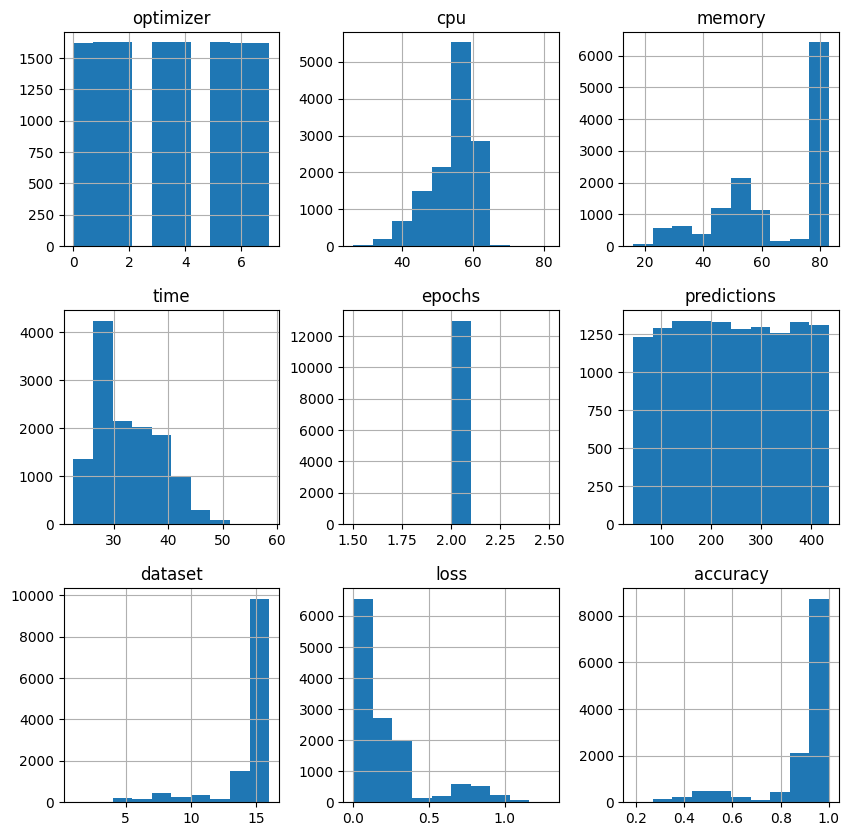

In [9]:
plot = df.hist(figsize=(10,10))

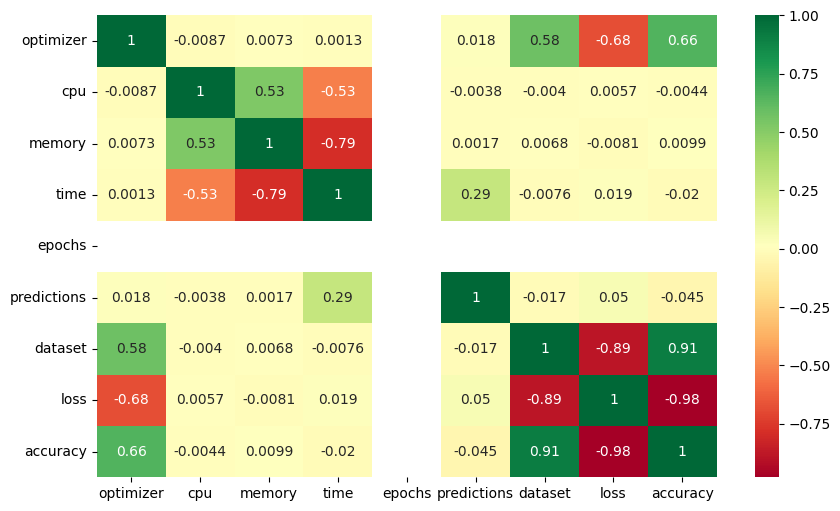

In [10]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap ='RdYlGn', annot=True)
plt.show()

In [11]:
X = df[['dataset','loss','accuracy','time','cpu','memory','predictions']]
y = df['optimizer']

In [12]:
X.head()

,dataset,loss,accuracy,time,cpu,memory,predictions
0,15,0.29111,0.86458,26.9857,81.400,78.475,304.5021
1,16,0.06496,0.98438,32.0057,77.775,61.225,304.5021
2,15,0.07996,0.97396,46.2330,45.275,52.975,87.0006
3,15,0.30984,0.86979,32.9408,62.925,51.200,435.0031
4,15,0.11819,0.95312,30.7948,64.925,28.575,87.0006


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
X_train

array([[ 0.57342281,  0.01940485,  0.26862072, ..., -0.2608532 ,
        -0.38412173, -1.22482245],
       [-0.54215769,  0.86937511, -0.42149607, ...,  0.16466826,
         0.79947992,  1.21548151],
       [-2.02959836,  2.51881271, -2.9520295 , ...,  0.16466826,
         0.8663665 ,  1.56409717],
       ...,
       [-0.17029753,  1.00566956, -1.11167597, ...,  1.38804247,
         0.79075558,  0.86686666],
       [ 0.57342281, -0.5296188 ,  0.40011962, ..., -0.10128265,
        -0.61386259,  0.51825181],
       [ 0.57342281, -0.40993325,  0.20293438, ...,  0.59778832,
         0.88236112,  1.56409717]])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
tree = DecisionTreeClassifier(max_depth=7)

tree.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(tree.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(tree.score(X_test, y_test)))

y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.577
Test set score: 0.556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       0.82      0.70      0.76       429
           2       0.28      0.30      0.29       400
           3       0.52      0.83      0.64       398
           4       0.70      0.85      0.77       384
           5       0.28      0.34      0.31       401
           6       0.64      0.21      0.32       447
           7       0.31      0.25      0.27       393

    accuracy                           0.56      3247
   macro avg       0.57      0.56      0.54      3247
weighted avg       0.57      0.56      0.54      3247



In [18]:
rf = RandomForestClassifier(max_depth=8)

rf.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(rf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(rf.score(X_test, y_test)))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

Train set score: 0.632
Test set score: 0.568
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       0.85      0.75      0.80       429
           2       0.30      0.23      0.26       400
           3       0.55      0.82      0.66       398
           4       0.72      0.85      0.78       384
           5       0.29      0.40      0.34       401
           6       0.70      0.20      0.31       447
           7       0.30      0.33      0.32       393

    accuracy                           0.57      3247
   macro avg       0.59      0.57      0.56      3247
weighted avg       0.59      0.57      0.55      3247



In [19]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.548
2,accuracy,0.287
0,dataset,0.105
3,time,0.018
6,predictions,0.018
5,memory,0.013
4,cpu,0.011


In [20]:
xg = XGBClassifier(n_estimators=29)

xg.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(xg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(xg.score(X_test, y_test)))

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.739
Test set score: 0.582
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       0.85      0.77      0.81       429
           2       0.29      0.26      0.27       400
           3       0.61      0.83      0.70       398
           4       0.76      0.87      0.81       384
           5       0.28      0.34      0.31       401
           6       0.63      0.26      0.37       447
           7       0.31      0.36      0.34       393

    accuracy                           0.58      3247
   macro avg       0.59      0.59      0.58      3247
weighted avg       0.59      0.58      0.57      3247



In [21]:
importances = pd.DataFrame({'Feature':X.columns,'Importance':np.round(xg.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)

importances

,Feature,Importance
1,loss,0.529
2,accuracy,0.188
6,predictions,0.106
0,dataset,0.076
3,time,0.037
5,memory,0.033
4,cpu,0.031


In [22]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.6, max_iter=500)

log.fit(X_train, y_train)

print('Train set score: {:.3f}'.format(log.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(log.score(X_test, y_test)))

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score: 0.550
Test set score: 0.537
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       395
           1       0.83      0.77      0.80       429
           2       0.23      0.19      0.21       400
           3       0.56      0.79      0.66       398
           4       0.74      0.84      0.79       384
           5       0.31      0.31      0.31       401
           6       0.21      0.15      0.18       447
           7       0.29      0.30      0.29       393

    accuracy                           0.54      3247
   macro avg       0.52      0.54      0.53      3247
weighted avg       0.52      0.54      0.52      3247



Neural Networks

In [23]:
# Scale the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the optimizer labels
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
num_classes = y_encoded.shape[1]

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded)

In [24]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X.shape[1],activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [25]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

# Fit the model to the training data
history = model.fit(X_train_nn, y_train_nn, epochs=200, batch_size=64, callbacks=[early_stopping], validation_data=(X_test_nn, y_test_nn))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_nn, y_test_nn)

# Print the test accuracy
print('Test accuracy:', test_acc)

Epoch 1/200
153/153 [==============================] - 5s 11ms/step - loss: 1.6810 - accuracy: 0.3664 - val_loss: 2.2028 - val_accuracy: 0.1217
Epoch 2/200
153/153 [==============================] - 1s 8ms/step - loss: 1.2581 - accuracy: 0.4584 - val_loss: 1.8975 - val_accuracy: 0.2036
Epoch 3/200
153/153 [==============================] - 1s 7ms/step - loss: 1.1428 - accuracy: 0.4957 - val_loss: 1.3749 - val_accuracy: 0.3717
Epoch 4/200
153/153 [==============================] - 1s 7ms/step - loss: 1.0952 - accuracy: 0.5190 - val_loss: 1.2692 - val_accuracy: 0.4536
Epoch 5/200
153/153 [==============================] - 1s 7ms/step - loss: 1.0525 - accuracy: 0.5300 - val_loss: 0.9761 - val_accuracy: 0.5667
Epoch 6/200
153/153 [==============================] - 1s 7ms/step - loss: 1.0460 - accuracy: 0.5290 - val_loss: 0.9948 - val_accuracy: 0.5476
Epoch 7/200
153/153 [==============================] - 1s 7ms/step - loss: 1.0234 - accuracy: 0.5465 - val_loss: 1.1662 - val_accuracy: 0.502

Minimum validation loss: 0.914


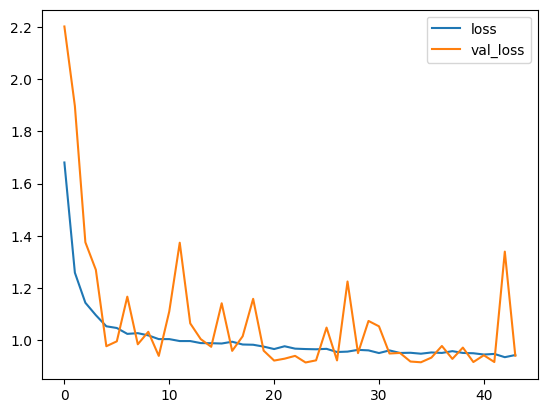

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {:.3f}".format(history_df['val_loss'].min()))

Max val_accuracy: 0.591


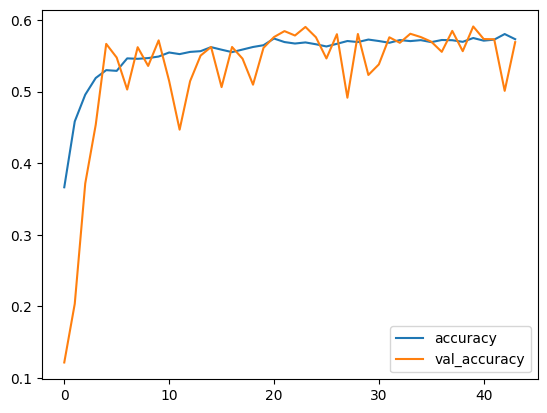

In [27]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
print("Max val_accuracy: {:.3f}".format(history_df['val_accuracy'].max()))

Saving the model

In [41]:
import os
from keras.models import load_model

# Save the trained model
model.save('model.h5')

# Save the fitted scaler and encoder objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# model.summary()

# Make predictions
def predict_best_optimizer(model, cpu, memory, dataset, loss, accuracy, time, predictions):
    input_data = np.array([[cpu, memory, dataset, loss, accuracy, time, predictions]])
    input_scaled = scaler.transform(input_data)
    probabilities = model.predict(input_scaled)
    best_optimizer_idx = np.argmax(probabilities)
    best_optimizer_onehot = np.zeros((1, probabilities.shape[1]))
    best_optimizer_onehot[0, best_optimizer_idx] = 1
    best_optimizer = encoder.inverse_transform(best_optimizer_onehot)[0][0]
    return best_optimizer

# Load the saved model
loaded_model = load_model('model.h5')
# Example usage
best_optimizer = predict_best_optimizer(loaded_model, cpu=81.4, memory=80, dataset=300,loss=0.09, accuracy=0.9, time=25, predictions=300)
print("Best optimizer:", best_optimizer)


if os.path.exists('scaler.pkl'):
  os.remove('scaler.pkl')

if os.path.exists('encoder.pkl'):
  os.remove('encoder.pkl')

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 180ms/step
Best optimizer: 4


In [52]:
import random
# Load the saved model
loaded_model = load_model('model.h5')
# Example usage
for i in range(0, 100):
    cpu = random.randint(30, 80)
    memory = random.randint(30, 80)
    dataset = random.randrange(60, 600, 60)
    time = random.randint(10, 60)
    predictions=random.randint(14, 16)
    loss, accuracy = 0.09, 0.9
    best_optimizer = predict_best_optimizer(loaded_model, cpu=cpu, memory=memory, dataset=dataset, loss=0.8, accuracy=0.5, time=time, predictions=predictions)
    print(f"cpu: {cpu}, memory: {memory}, dataset: {dataset}, loss: {loss}, accuracy: {accuracy}, time: {time}, predictions: {predictions} | optimizer #{i}:", best_optimizer)

1/1 [==============================] - 0s 135ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 40, memory: 62, dataset: 300, loss: 0.09, accuracy: 0.9, time: 19, predictions: 14 | optimizer #0: 6
1/1 [==============================] - 0s 24ms/step
cpu: 57, memory: 79, dataset: 300, loss: 0.09, accuracy: 0.9, time: 60, predictions: 16 | optimizer #1: 6
1/1 [==============================] - 0s 40ms/step
cpu: 53, memory: 51, dataset: 360, loss: 0.09, accuracy: 0.9, time: 31, predictions: 15 | optimizer #2: 6
1/1 [==============================] - 0s 29ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 77, memory: 54, dataset: 240, loss: 0.09, accuracy: 0.9, time: 22, predictions: 16 | optimizer #3: 6
1/1 [==============================] - 0s 27ms/step
cpu: 71, memory: 32, dataset: 60, loss: 0.09, accuracy: 0.9, time: 28, predictions: 15 | optimizer #4: 6
1/1 [==============================] - 0s 34ms/step
cpu: 76, memory: 66, dataset: 420, loss: 0.09, accuracy: 0.9, time: 26, predictions: 14 | optimizer #5: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step
cpu: 75, memory: 33, dataset: 240, loss: 0.09, accuracy: 0.9, time: 15, predictions: 15 | optimizer #6: 6
1/1 [==============================] - 0s 28ms/step
cpu: 67, memory: 36, dataset: 300, loss: 0.09, accuracy: 0.9, time: 50, predictions: 15 | optimizer #7: 6
1/1 [==============================] - 0s 27ms/step
cpu: 48, memory: 61, dataset: 300, loss: 0.09, accuracy: 0.9, time: 33, predictions: 15 | optimizer #8: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 32, memory: 47, dataset: 60, loss: 0.09, accuracy: 0.9, time: 36, predictions: 14 | optimizer #9: 6
1/1 [==============================] - 0s 29ms/step
cpu: 62, memory: 68, dataset: 540, loss: 0.09, accuracy: 0.9, time: 15, predictions: 15 | optimizer #10: 6
1/1 [==============================] - 0s 27ms/step
cpu: 70, memory: 64, dataset: 360, loss: 0.09, accuracy: 0.9, time: 44, predictions: 16 | optimizer #11: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
cpu: 47, memory: 33, dataset: 60, loss: 0.09, accuracy: 0.9, time: 13, predictions: 16 | optimizer #12: 6
1/1 [==============================] - 0s 26ms/step
cpu: 48, memory: 71, dataset: 120, loss: 0.09, accuracy: 0.9, time: 19, predictions: 16 | optimizer #13: 6
1/1 [==============================] - 0s 26ms/step
cpu: 56, memory: 55, dataset: 540, loss: 0.09, accuracy: 0.9, time: 19, predictions: 14 | optimizer #14: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
cpu: 55, memory: 43, dataset: 480, loss: 0.09, accuracy: 0.9, time: 23, predictions: 14 | optimizer #15: 6
1/1 [==============================] - 0s 42ms/step
cpu: 59, memory: 38, dataset: 240, loss: 0.09, accuracy: 0.9, time: 43, predictions: 15 | optimizer #16: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
cpu: 54, memory: 68, dataset: 120, loss: 0.09, accuracy: 0.9, time: 45, predictions: 14 | optimizer #17: 6
1/1 [==============================] - 0s 34ms/step
cpu: 65, memory: 37, dataset: 120, loss: 0.09, accuracy: 0.9, time: 26, predictions: 14 | optimizer #18: 4
1/1 [==============================] - 0s 31ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 34, memory: 42, dataset: 540, loss: 0.09, accuracy: 0.9, time: 22, predictions: 14 | optimizer #19: 6
1/1 [==============================] - 0s 28ms/step
cpu: 75, memory: 50, dataset: 240, loss: 0.09, accuracy: 0.9, time: 43, predictions: 15 | optimizer #20: 6
1/1 [==============================] - 0s 31ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 46, memory: 41, dataset: 480, loss: 0.09, accuracy: 0.9, time: 11, predictions: 16 | optimizer #21: 6
1/1 [==============================] - 0s 31ms/step
cpu: 57, memory: 40, dataset: 240, loss: 0.09, accuracy: 0.9, time: 13, predictions: 16 | optimizer #22: 6
1/1 [==============================] - 0s 26ms/step
cpu: 59, memory: 55, dataset: 360, loss: 0.09, accuracy: 0.9, time: 19, predictions: 15 | optimizer #23: 6
1/1 [==============================] - 0s 34ms/step
cpu: 30, memory: 42, dataset: 300, loss: 0.09, accuracy: 0.9, time: 53, predictions: 15 | optimizer #24: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step
cpu: 32, memory: 38, dataset: 360, loss: 0.09, accuracy: 0.9, time: 52, predictions: 16 | optimizer #25: 6
1/1 [==============================] - 0s 29ms/step
cpu: 58, memory: 47, dataset: 480, loss: 0.09, accuracy: 0.9, time: 16, predictions: 14 | optimizer #26: 6
1/1 [==============================] - 0s 27ms/step
cpu: 44, memory: 52, dataset: 300, loss: 0.09, accuracy: 0.9, time: 34, predictions: 14 | optimizer #27: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 76, memory: 80, dataset: 480, loss: 0.09, accuracy: 0.9, time: 52, predictions: 16 | optimizer #28: 6
1/1 [==============================] - 0s 28ms/step
cpu: 54, memory: 51, dataset: 540, loss: 0.09, accuracy: 0.9, time: 18, predictions: 16 | optimizer #29: 6
1/1 [==============================] - 0s 29ms/step
cpu: 45, memory: 61, dataset: 120, loss: 0.09, accuracy: 0.9, time: 14, predictions: 15 | optimizer #30:

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


 6
1/1 [==============================] - 0s 28ms/step
cpu: 41, memory: 78, dataset: 540, loss: 0.09, accuracy: 0.9, time: 13, predictions: 16 | optimizer #31: 6
1/1 [==============================] - 0s 36ms/step
cpu: 78, memory: 31, dataset: 180, loss: 0.09, accuracy: 0.9, time: 33, predictions: 14 | optimizer #32: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 37, memory: 51, dataset: 120, loss: 0.09, accuracy: 0.9, time: 32, predictions: 16 | optimizer #33: 6
1/1 [==============================] - 0s 30ms/step
cpu: 59, memory: 38, dataset: 360, loss: 0.09, accuracy: 0.9, time: 21, predictions: 14 | optimizer #34: 6
1/1 [==============================] - 0s 34ms/step
cpu: 45, memory: 32, dataset: 120, loss: 0.09, accuracy: 0.9, time: 51, predictions: 14 | optimizer #35: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
cpu: 43, memory: 31, dataset: 240, loss: 0.09, accuracy: 0.9, time: 38, predictions: 15 | optimizer #36: 6
1/1 [==============================] - 0s 27ms/step
cpu: 69, memory: 40, dataset: 420, loss: 0.09, accuracy: 0.9, time: 39, predictions: 16 | optimizer #37: 6
1/1 [==============================] - 0s 26ms/step
cpu: 80, memory: 63, dataset: 480, loss: 0.09, accuracy: 0.9, time: 23, predictions: 15 | optimizer #38: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step
cpu: 32, memory: 76, dataset: 120, loss: 0.09, accuracy: 0.9, time: 25, predictions: 14 | optimizer #39: 6
1/1 [==============================] - 0s 27ms/step
cpu: 80, memory: 75, dataset: 480, loss: 0.09, accuracy: 0.9, time: 58, predictions: 16 | optimizer #40: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
cpu: 37, memory: 42, dataset: 240, loss: 0.09, accuracy: 0.9, time: 23, predictions: 14 | optimizer #41: 6
1/1 [==============================] - 0s 29ms/step
cpu: 50, memory: 30, dataset: 240, loss: 0.09, accuracy: 0.9, time: 39, predictions: 15 | optimizer #42: 6
1/1 [==============================] - 0s 26ms/step
cpu: 68, memory: 74, dataset: 480, loss: 0.09, accuracy: 0.9, time: 15, predictions: 14 | optimizer #43: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
cpu: 77, memory: 64, dataset: 180, loss: 0.09, accuracy: 0.9, time: 28, predictions: 14 | optimizer #44: 6
1/1 [==============================] - 0s 28ms/step
cpu: 68, memory: 61, dataset: 120, loss: 0.09, accuracy: 0.9, time: 54, predictions: 15 | optimizer #45: 6
1/1 [==============================] - 0s 31ms/step
cpu: 60, memory: 69, dataset: 300, loss: 0.09, accuracy: 0.9, time: 18, predictions: 14 | optimizer #46: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
cpu: 60, memory: 66, dataset: 420, loss: 0.09, accuracy: 0.9, time: 12, predictions: 16 | optimizer #47: 6
1/1 [==============================] - 0s 32ms/step
cpu: 33, memory: 32, dataset: 420, loss: 0.09, accuracy: 0.9, time: 58, predictions: 16 | optimizer #48: 6
1/1 [==============================] - 0s 27ms/step
cpu: 62, memory: 33, dataset: 360, loss: 0.09, accuracy: 0.9, time: 60, predictions: 14 | optimizer #49: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 76, memory: 30, dataset: 480, loss: 0.09, accuracy: 0.9, time: 11, predictions: 15 | optimizer #50: 6
1/1 [==============================] - 0s 29ms/step
cpu: 72, memory: 37, dataset: 180, loss: 0.09, accuracy: 0.9, time: 31, predictions: 14 | optimizer #51: 6
1/1 [==============================] - 0s 31ms/step
cpu: 56, memory: 56, dataset: 480, loss: 0.09, accuracy: 0.9, time: 50, predictions: 15 | optimizer #52: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
cpu: 69, memory: 48, dataset: 120, loss: 0.09, accuracy: 0.9, time: 18, predictions: 16 | optimizer #53: 6
1/1 [==============================] - 0s 28ms/step
cpu: 54, memory: 70, dataset: 180, loss: 0.09, accuracy: 0.9, time: 26, predictions: 16 | optimizer #54: 6
1/1 [==============================] - 0s 28ms/step
cpu: 54, memory: 43, dataset: 120, loss: 0.09, accuracy: 0.9, time: 29, predictions: 14 | optimizer #55: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step
cpu: 58, memory: 58, dataset: 300, loss: 0.09, accuracy: 0.9, time: 52, predictions: 14 | optimizer #56: 6
1/1 [==============================] - 0s 29ms/step
cpu: 36, memory: 40, dataset: 240, loss: 0.09, accuracy: 0.9, time: 46, predictions: 16 | optimizer #57: 6
1/1 [==============================] - 0s 29ms/step
cpu: 75, memory: 65, dataset: 240, loss: 0.09, accuracy: 0.9, time: 51, predictions: 16 | optimizer #58: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
cpu: 36, memory: 76, dataset: 420, loss: 0.09, accuracy: 0.9, time: 30, predictions: 16 | optimizer #59: 6
1/1 [==============================] - 0s 32ms/step
cpu: 47, memory: 71, dataset: 480, loss: 0.09, accuracy: 0.9, time: 57, predictions: 15 | optimizer #60: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 51, memory: 34, dataset: 480, loss: 0.09, accuracy: 0.9, time: 59, predictions: 14 | optimizer #61: 6
1/1 [==============================] - 0s 35ms/step
cpu: 59, memory: 80, dataset: 300, loss: 0.09, accuracy: 0.9, time: 58, predictions: 15 | optimizer #62: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step
cpu: 67, memory: 67, dataset: 240, loss: 0.09, accuracy: 0.9, time: 54, predictions: 15 | optimizer #63: 6
1/1 [==============================] - 0s 28ms/step
cpu: 58, memory: 39, dataset: 120, loss: 0.09, accuracy: 0.9, time: 56, predictions: 15 | optimizer #64: 6
1/1 [==============================] - 0s 28ms/step


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


cpu: 37, memory: 68, dataset: 420, loss: 0.09, accuracy: 0.9, time: 29, predictions: 15 | optimizer #65: 6
1/1 [==============================] - 0s 32ms/step
cpu: 38, memory: 50, dataset: 480, loss: 0.09, accuracy: 0.9, time: 25, predictions: 14 | optimizer #66: 6
1/1 [==============================] - 0s 34ms/step
cpu: 74, memory: 33, dataset: 120, loss: 0.09, accuracy: 0.9, time: 29, predictions: 16 | optimizer #67: 4
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
cpu: 60, memory: 49, dataset: 60, loss: 0.09, accuracy: 0.9, time: 39, predictions: 16 | optimizer #68: 6
1/1 [==============================] - 0s 29ms/step
cpu: 68, memory: 68, dataset: 480, loss: 0.09, accuracy: 0.9, time: 33, predictions: 16 | optimizer #69: 6
1/1 [==============================] - 0s 29ms/step
cpu: 64, memory: 62, dataset: 240, loss: 0.09, accuracy: 0.9, time: 11, predictions: 14 | optimizer #70: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
cpu: 58, memory: 68, dataset: 240, loss: 0.09, accuracy: 0.9, time: 57, predictions: 14 | optimizer #71: 6
1/1 [==============================] - 0s 26ms/step
cpu: 41, memory: 56, dataset: 120, loss: 0.09, accuracy: 0.9, time: 13, predictions: 14 | optimizer #72: 6
1/1 [==============================] - 0s 25ms/step
cpu: 58, memory: 42, dataset: 480, loss: 0.09, accuracy: 0.9, time: 52, predictions: 15 | optimizer #73: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
cpu: 58, memory: 35, dataset: 180, loss: 0.09, accuracy: 0.9, time: 46, predictions: 14 | optimizer #74: 6
1/1 [==============================] - 0s 38ms/step
cpu: 76, memory: 78, dataset: 360, loss: 0.09, accuracy: 0.9, time: 45, predictions: 16 | optimizer #75: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
cpu: 76, memory: 61, dataset: 240, loss: 0.09, accuracy: 0.9, time: 46, predictions: 15 | optimizer #76: 6
1/1 [==============================] - 0s 45ms/step
cpu: 48, memory: 74, dataset: 360, loss: 0.09, accuracy: 0.9, time: 57, predictions: 16 | optimizer #77: 6
1/1 [==============================] - 0s 29ms/step
cpu: 61, memory: 38, dataset: 540, loss: 0.09, accuracy: 0.9, time: 40, predictions: 16 | optimizer #78:

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


 6
1/1 [==============================] - 0s 34ms/step
cpu: 51, memory: 71, dataset: 120, loss: 0.09, accuracy: 0.9, time: 51, predictions: 16 | optimizer #79: 6
1/1 [==============================] - 0s 29ms/step
cpu: 39, memory: 47, dataset: 540, loss: 0.09, accuracy: 0.9, time: 45, predictions: 15 | optimizer #80: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
cpu: 49, memory: 56, dataset: 300, loss: 0.09, accuracy: 0.9, time: 40, predictions: 16 | optimizer #81: 6
1/1 [==============================] - 0s 28ms/step
cpu: 77, memory: 62, dataset: 360, loss: 0.09, accuracy: 0.9, time: 24, predictions: 16 | optimizer #82: 6
1/1 [==============================] - ETA: 0s

c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
cpu: 68, memory: 70, dataset: 420, loss: 0.09, accuracy: 0.9, time: 60, predictions: 15 | optimizer #83: 6
1/1 [==============================] - 0s 27ms/step
cpu: 54, memory: 44, dataset: 360, loss: 0.09, accuracy: 0.9, time: 40, predictions: 15 | optimizer #84: 6
1/1 [==============================] - 0s 26ms/step
cpu: 49, memory: 78, dataset: 360, loss: 0.09, accuracy: 0.9, time: 18, predictions: 15 | optimizer #85: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 69, memory: 69, dataset: 480, loss: 0.09, accuracy: 0.9, time: 47, predictions: 16 | optimizer #86: 6
1/1 [==============================] - 0s 31ms/step
cpu: 70, memory: 71, dataset: 360, loss: 0.09, accuracy: 0.9, time: 35, predictions: 15 | optimizer #87: 6
1/1 [==============================] - 0s 34ms/step
cpu: 64, memory: 47, dataset: 240, loss: 0.09, accuracy: 0.9, time: 57, predictions: 15 | optimizer #88: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
cpu: 45, memory: 40, dataset: 180, loss: 0.09, accuracy: 0.9, time: 53, predictions: 15 | optimizer #89: 6
1/1 [==============================] - 0s 29ms/step
cpu: 44, memory: 79, dataset: 120, loss: 0.09, accuracy: 0.9, time: 23, predictions: 14 | optimizer #90: 6
1/1 [==============================] - 0s 27ms/step
cpu: 50, memory: 76, dataset: 300, loss: 0.09, accuracy: 0.9, time: 25, predictions: 15 | optimizer #91: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
cpu: 37, memory: 43, dataset: 480, loss: 0.09, accuracy: 0.9, time: 46, predictions: 14 | optimizer #92: 6
1/1 [==============================] - 0s 25ms/step
cpu: 68, memory: 52, dataset: 480, loss: 0.09, accuracy: 0.9, time: 30, predictions: 15 | optimizer #93: 6
1/1 [==============================] - 0s 26ms/step
cpu: 68, memory: 59, dataset: 540, loss: 0.09, accuracy: 0.9, time: 12, predictions: 15 | optimizer #94: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
cpu: 73, memory: 69, dataset: 240, loss: 0.09, accuracy: 0.9, time: 15, predictions: 16 | optimizer #95: 6
1/1 [==============================] - 0s 28ms/step
cpu: 39, memory: 72, dataset: 540, loss: 0.09, accuracy: 0.9, time: 38, predictions: 15 | optimizer #96: 6
1/1 [==============================] - 0s 26ms/step
cpu: 31, memory: 45, dataset: 180, loss: 0.09, accuracy: 0.9, time: 21, predictions: 14 | optimizer #97: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step
cpu: 41, memory: 80, dataset: 420, loss: 0.09, accuracy: 0.9, time: 47, predictions: 16 | optimizer #98: 6
1/1 [==============================] - 0s 31ms/step
cpu: 77, memory: 76, dataset: 480, loss: 0.09, accuracy: 0.9, time: 11, predictions: 16 | optimizer #99: 6


c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
